# Research Questions: <br>
- What factors contribute the most to a company failing? <br>
- In high corruption areas is it harder for women (or both men and women) to start a business? <br>
- Do homocides have an impact on entrepreneurship?

# Data Discrption: <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data collection:
We combined multiple data sets, one from the mexican government about companies in mexico and another that was collected informaiton about mexican states. We aggregated this data so we have information about each company and the state it is located in. Data was collected into a stata file with 263 columns. We discussed which columns we wanted to use for our analysis and then we used R to download the file in chunks (of size 10000) and combine into one csv. 

Column names and their meanings:

sector: 'type of company', id: 'id of company (unique?)', panelyear: 'year data was taken', f_inc_siem_year: 'start of company (?)', failure: '0 = not failed 1 = failed', Totalpopulation : 'total population that year', SpeaksIndigenouslanguage: 'The number of people who speak indigenous languages in that state', SpeaksIndigenouslanguageSpan: 'The number of people who speak indigenous languages and spanish in that state',
SpeaksIndigenouslanguageNoS: 'The number of people who speak indigenous languages and no spanish in that state', 
Immigrantfromanotherstate: 'Number of immigrants from other states in a given state',
Immigrantfromanothercountry: 'Number of immigrants from other countires in a given state',
Noschooling: 'people who have no schooling in a given state', 
Primaryeducation: 'people who have primary education in a given state', 
Secundaryeducation: 'people who have secundary education in a given state', 
Highschool: 'people who have high school education in a given state', 
Undergradandgradschool: 'people who have undergrad/grad education education in a given state', 
Totaleconomicallyactivepopulat: 'people who have are economically active in a given state', 
Totalemployed: 'people who are employed in a given state', 
Noincome: 'people with no income in a given state', 
Lessthan1minwage: 'people who have less than 1 minimum wage in a given state', 
to2minwage: 'people who have less than 2 minimum wage in a given state',
to5minwages: 'people who have less than 5 minimum wage in a given state',
morethan5minwages: 'people who have more than 5 minimum wage in a given state',
AgriSector: 'people who work in agriculture in a given state',
MiningSector: 'people who work in mining in a given state',
Construction: 'people who work in construction in a given state',
CommerceSector: 'people who work in commerce in a given state',
CommTransports: 'people who work in comm transports in a given state',
ServicesSector: 'people who work in service in a given state',
politicalkilling: 'number of political killings in a given state',
homicides: 'number of homicides in a given state',
corruption: 'number of corruption (out of 100) in a given state',
state: 'state of company',
FDI: 'Foreign direct investment in a given state',
Total_crime: 'total crime in a given state',
Violent_crimes_total: 'total violent crime in a given state',
homicidespc: 'homicides per capita in a given state',
Total_crimepc: 'crime per capita in a given state',
Unemploymentrate: 'rate of unemployment in a given state'

In [2]:
mexico = pd.read_csv('ILoveEmily.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#dropping column we don't need
mexico = mexico.drop(columns = ['Unnamed: 0'])

In [4]:
mexico.head()

,sector,id,panelyear,f_inc_siem_year,failure,Totalpopulation,SpeaksIndigenouslanguage,SpeaksIndigenouslanguageSpan,SpeaksIndigenouslanguageNoS,Immigrantfromanotherstate,...,homicides,corruption,state,FDI,Total_crime,Violent_crimes_total,homicidespc,Total_crimepc,Unemploymentrate,Violent_crimes_totalpc
0,NaN,1.0,2008,2008.0,1,527637.8,6694.8,5954.4,27.2,14630.4,...,79.0,85.566668,Distrito Federal,13275.001032,172721.0,48470.0,0.000150,0.327348,0.038066,0.091862
1,COMERCIO AL POR MENOR,2.0,2010,2009.0,1,620416.0,5559.0,4705.0,12.0,8502.0,...,56.0,82.099998,Distrito Federal,7537.817773,195530.0,48695.0,0.000090,0.315159,0.052158,0.078488
2,NaN,3.0,2008,2008.0,0,625894.8,45359.6,43627.8,103.8,55237.8,...,95.0,94.166664,Quintana Roo,154.247371,34709.0,2185.0,0.000152,0.055455,0.032546,0.003491
3,OTROS SERVICIOS EXCEPTO ACTIVIDADES DE GOBIERNO,3.0,2010,2008.0,1,661176.0,41642.0,39405.0,65.0,50827.0,...,97.0,94.099998,Quintana Roo,61.263203,34965.0,2713.0,0.000147,0.052883,0.035710,0.004103
4,NaN,4.0,2008,2008.0,0,625894.8,45359.6,43627.8,103.8,55237.8,...,95.0,94.166664,Quintana Roo,154.247371,34709.0,2185.0,0.000152,0.055455,0.032546,0.003491


In [5]:
mexico.isna().sum()

sector                            4339897
id                                 557365
panelyear                               0
f_inc_siem_year                      3754
failure                                 0
Totalpopulation                    666847
SpeaksIndigenouslanguage           666928
SpeaksIndigenouslanguageSpan       667542
SpeaksIndigenouslanguageNoS       1130300
Immigrantfromanotherstate          666938
Immigrantfromanothercountry        672911
Noschooling                        666847
Primaryeducation                   666847
Secundaryeducation                 666847
Highschool                         666847
Undergradandgradschool             666847
Totaleconomicallyactivepopulat     667940
Totalemployed                      714355
Noincome                           714355
Lessthan1minwage                   714355
to2minwage                         714355
to5minwages                        714355
morethan5minwages                  714355
AgriSector                        

In [6]:
mexico['is_homicides_na'] = 0 #not NA
mexico.loc[mexico['homicides'].isna(), 'is_homicides_na'] = 1

In [7]:
mexico['is_corruption_na'] = 0 #not Na
mexico.loc[mexico['corruption'].isna(), 'is_corruption_na'] = 1

In [8]:
l = mexico['is_corruption_na'] == mexico['is_homicides_na']
[i for i, x in enumerate(l) if x==False] #check if any are false
#all the rows where corruption is na, homicides is also na so we are going to drop these rows

[]

In [9]:
#all the rows where corruption is na, homicides is also na so we are going to drop these rows
#also the same rows where sate is na so we can't see if there is correlation between state and na
mexico = mexico[mexico['homicides'].notna()]

In [10]:
mexico.isna().sum()

sector                            3682198
id                                      0
panelyear                               0
f_inc_siem_year                       315
failure                                 0
Totalpopulation                       713
SpeaksIndigenouslanguage              794
SpeaksIndigenouslanguageSpan         1408
SpeaksIndigenouslanguageNoS        464166
Immigrantfromanotherstate             804
Immigrantfromanothercountry          6777
Noschooling                           713
Primaryeducation                      713
Secundaryeducation                    713
Highschool                            713
Undergradandgradschool                713
Totaleconomicallyactivepopulat       1806
Totalemployed                       48221
Noincome                            48221
Lessthan1minwage                    48221
to2minwage                          48221
to5minwages                         48221
morethan5minwages                   48221
AgriSector                        

In [11]:
states = list(mexico.state.unique())
poplist = []
for s in states:
    subset = mexico[mexico['state'] == s]
    avgp = np.mean(subset['Totalpopulation'])
    poplist = poplist + [avgp]
    print('State: ', s, ' Avg Pop: ', avgp )

State:  Distrito Federal  Avg Pop:  743251.0135383008
State:  Quintana Roo  Avg Pop:  368638.0421091246
State:  Guanajuato  Avg Pop:  452628.8662088072
State:  Veracruz de Ignacio de la Llave  Avg Pop:  178474.38171835427
State:  Sonora  Avg Pop:  435808.699136985
State:  Puebla  Avg Pop:  991032.2851513061
State:  Tamaulipas  Avg Pop:  318012.06033065496
State:  Jalisco  Avg Pop:  1030316.7683813091
State:  México  Avg Pop:  518610.59489864466
State:  Baja California Sur  Avg Pop:  188352.15212920844
State:  Coahuila de Zaragoza  Avg Pop:  500900.89582421776
State:  Querétaro  Avg Pop:  558778.1332524873
State:  Michoacán de Ocampo  Avg Pop:  364742.82618330326
State:  Nuevo León  Avg Pop:  614067.6295364212
State:  Aguascalientes  Avg Pop:  645512.4541797532
State:  Baja California  Avg Pop:  895976.9937461385
State:  Yucatán  Avg Pop:  495529.55140370096
State:  Tlaxcala  Avg Pop:  47400.006066940674
State:  Guerrero  Avg Pop:  407928.8020341724
State:  San Luis Potosí  Avg Pop:  27

In [12]:
states = list(mexico.state.unique())
for s in states:
    subset = mexico[mexico['state'] == s]
    subset['is_pop_na'] = 0 #not Na
    subset.loc[subset['Totalpopulation'].isna(), 'is_pop_na'] = 1
    numna = sum(subset['is_pop_na'])
    print('State: ', s, ' Num Pop Na: ', numna )

<ipython-input-12-743be84ee252>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['is_pop_na'] = 0 #not Na
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


State:  Distrito Federal  Num Pop Na:  0
State:  Quintana Roo  Num Pop Na:  228
State:  Guanajuato  Num Pop Na:  0
State:  Veracruz de Ignacio de la Llave  Num Pop Na:  0
State:  Sonora  Num Pop Na:  0
State:  Puebla  Num Pop Na:  0
State:  Tamaulipas  Num Pop Na:  0
State:  Jalisco  Num Pop Na:  485
State:  México  Num Pop Na:  0
State:  Baja California Sur  Num Pop Na:  0
State:  Coahuila de Zaragoza  Num Pop Na:  0
State:  Querétaro  Num Pop Na:  0
State:  Michoacán de Ocampo  Num Pop Na:  0
State:  Nuevo León  Num Pop Na:  0
State:  Aguascalientes  Num Pop Na:  0
State:  Baja California  Num Pop Na:  0
State:  Yucatán  Num Pop Na:  0
State:  Tlaxcala  Num Pop Na:  0
State:  Guerrero  Num Pop Na:  0
State:  San Luis Potosí  Num Pop Na:  0
State:  Chihuahua  Num Pop Na:  0
State:  Hidalgo  Num Pop Na:  0
State:  Sinaloa  Num Pop Na:  0
State:  Morelos  Num Pop Na:  0
State:  Nayarit  Num Pop Na:  0
State:  Oaxaca  Num Pop Na:  0
State:  Campeche  Num Pop Na:  0
State:  Zacatecas  Num

In [17]:
#you can see that only two states have NA values for Total Population. 
#Since the NA's are not random we don't want to just remove them. We are going to replace them by the average 
#total population for that state
def state_year(row):
    sub = mexico[(mexico['state'] == row['state'])]
    sub2 = sub[sub['panelyear'] == row['panelyear']]
    pop = sub2['Totalpopulation']
    np.mean(pop)
    return(np.mean(pop))
mexico['Totalpopulation'] = mexico.apply(
     lambda row: state_year(row) if np.isnan(row['Totalpopulation']) else row['Totalpopulation'],
    axis=1)

In [20]:
mexico.isna().sum()

sector                            3682198
id                                      0
panelyear                               0
f_inc_siem_year                       315
failure                                 0
Totalpopulation                         0
SpeaksIndigenouslanguage              794
SpeaksIndigenouslanguageSpan         1408
SpeaksIndigenouslanguageNoS        464166
Immigrantfromanotherstate             804
Immigrantfromanothercountry          6777
Noschooling                           713
Primaryeducation                      713
Secundaryeducation                    713
Highschool                            713
Undergradandgradschool                713
Totaleconomicallyactivepopulat       1806
Totalemployed                       48221
Noincome                            48221
Lessthan1minwage                    48221
to2minwage                          48221
to5minwages                         48221
morethan5minwages                   48221
AgriSector                        

# Data limitations:
- There are lots of NaN values and it can be hard to determine whether to drop them or fill them in.
- We only have data on 22/32 States in Mexico (so we can only draw conclustions about those states and not necessarily about all of Mexico)
- The data has been passed from multiple people and in multiple formats (Stata and now csv). So we have to communicate with others to see how they have changed and added to the raw data and what some of the column names mean because it didn't come with a data dictionary. 
- Data is very big and messy

# EDA:

In [21]:
mexico.head()

,sector,id,panelyear,f_inc_siem_year,failure,Totalpopulation,SpeaksIndigenouslanguage,SpeaksIndigenouslanguageSpan,SpeaksIndigenouslanguageNoS,Immigrantfromanotherstate,...,state,FDI,Total_crime,Violent_crimes_total,homicidespc,Total_crimepc,Unemploymentrate,Violent_crimes_totalpc,is_homicides_na,is_corruption_na
0,NaN,1.0,2008,2008.0,1,527637.8,6694.8,5954.4,27.2,14630.4,...,Distrito Federal,13275.001032,172721.0,48470.0,0.000150,0.327348,0.038066,0.091862,0,0
1,COMERCIO AL POR MENOR,2.0,2010,2009.0,1,620416.0,5559.0,4705.0,12.0,8502.0,...,Distrito Federal,7537.817773,195530.0,48695.0,0.000090,0.315159,0.052158,0.078488,0,0
2,NaN,3.0,2008,2008.0,0,625894.8,45359.6,43627.8,103.8,55237.8,...,Quintana Roo,154.247371,34709.0,2185.0,0.000152,0.055455,0.032546,0.003491,0,0
3,OTROS SERVICIOS EXCEPTO ACTIVIDADES DE GOBIERNO,3.0,2010,2008.0,1,661176.0,41642.0,39405.0,65.0,50827.0,...,Quintana Roo,61.263203,34965.0,2713.0,0.000147,0.052883,0.035710,0.004103,0,0
4,NaN,4.0,2008,2008.0,0,625894.8,45359.6,43627.8,103.8,55237.8,...,Quintana Roo,154.247371,34709.0,2185.0,0.000152,0.055455,0.032546,0.003491,0,0


In [22]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374413 entries, 0 to 4483181
Data columns (total 42 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   sector                          object 
 1   id                              float64
 2   panelyear                       int64  
 3   f_inc_siem_year                 float64
 4   failure                         int64  
 5   Totalpopulation                 float64
 6   SpeaksIndigenouslanguage        float64
 7   SpeaksIndigenouslanguageSpan    float64
 8   SpeaksIndigenouslanguageNoS     float64
 9   Immigrantfromanotherstate       float64
 10  Immigrantfromanothercountry     float64
 11  Noschooling                     float64
 12  Primaryeducation                float64
 13  Secundaryeducation              float64
 14  Highschool                      float64
 15  Undergradandgradschool          float64
 16  Totaleconomicallyactivepopulat  float64
 17  Totalemployed              

In [23]:
mexico = mexico.drop(columns = ['is_homicides_na', 'is_corruption_na'])
mexico.describe()

,id,panelyear,f_inc_siem_year,failure,Totalpopulation,SpeaksIndigenouslanguage,SpeaksIndigenouslanguageSpan,SpeaksIndigenouslanguageNoS,Immigrantfromanotherstate,Immigrantfromanothercountry,...,politicalkilling,homicides,corruption,FDI,Total_crime,Violent_crimes_total,homicidespc,Total_crimepc,Unemploymentrate,Violent_crimes_totalpc
count,4.374413e+06,4.374413e+06,4.374098e+06,4.374413e+06,4.374413e+06,4.373619e+06,4.373005e+06,3.910247e+06,4.373609e+06,4.367636e+06,...,4.374413e+06,4.374413e+06,4.374413e+06,4.374413e+06,4.374413e+06,4.374413e+06,4.373700e+06,4.373700e+06,4.372059e+06,4.373700e+06
mean,1.297658e+06,2.006144e+03,2.004777e+03,2.573929e-01,5.698417e+05,8.227167e+03,7.708680e+03,1.097132e+02,1.460724e+04,2.099250e+03,...,4.857795e-04,8.942507e+01,8.984470e+01,2.075127e+03,8.861017e+04,1.546244e+04,1.298580e-04,8.165843e-01,3.381969e-02,1.070269e-01
std,7.462358e+05,3.584371e+00,3.679114e+00,4.371977e-01,5.136039e+05,1.322218e+04,1.281667e+04,5.540512e+02,1.549996e+04,2.167144e+03,...,2.203505e-02,2.381514e+02,5.054333e+00,4.703761e+03,7.680937e+04,2.088984e+04,2.155948e-04,2.792408e+00,1.555335e-02,4.364578e-01
min,1.000000e+00,1.997000e+03,1.980000e+03,0.000000e+00,2.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.860000e+01,-5.315707e+02,1.547000e+03,1.600000e+01,0.000000e+00,3.675695e-03,0.000000e+00,2.975191e-05
25%,6.560200e+05,2.003000e+03,2.001000e+03,0.000000e+00,1.281734e+05,1.328800e+03,1.117000e+03,5.200000e+00,2.364800e+03,4.332000e+02,...,0.000000e+00,8.000000e+00,8.700000e+01,1.765796e+01,2.744400e+04,1.197000e+03,4.668367e-05,5.908238e-02,2.269534e-02,3.491002e-03
50%,1.311402e+06,2.007000e+03,2.005000e+03,0.000000e+00,4.375704e+05,3.797000e+03,3.427600e+03,2.000000e+01,1.104480e+04,1.401000e+03,...,0.000000e+00,3.500000e+01,9.133333e+01,1.372539e+02,6.846300e+04,3.898000e+03,8.314657e-05,1.665083e-01,3.254552e-02,1.304605e-02
75%,1.944397e+06,2.010000e+03,2.008000e+03,1.000000e+00,8.019400e+05,8.451000e+03,7.644000e+03,5.000000e+01,2.087820e+04,3.208200e+03,...,0.000000e+00,9.300000e+01,9.335000e+01,6.643363e+02,1.539970e+05,4.056400e+04,1.410222e-04,4.704099e-01,4.293407e-02,7.371520e-02
max,2.592729e+06,2.011000e+03,2.012000e+03,1.000000e+00,1.820888e+06,1.016170e+05,8.905680e+04,2.725100e+04,1.257985e+05,1.977940e+04,...,1.000000e+00,3.684000e+03,1.000000e+02,2.204306e+04,2.974170e+05,8.855600e+04,2.270948e-02,2.429316e+02,3.108588e-01,1.979487e+01


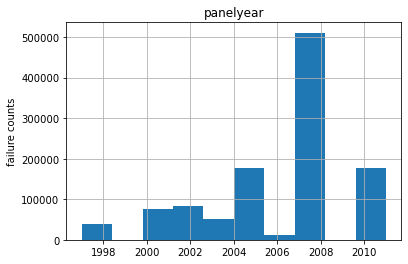

In [24]:
mexico.hist('panelyear',weights=mexico['failure'] )
plt.ylabel('failure counts')
plt.show()

In [25]:
years = list(mexico.panelyear.unique())
years.sort()
numfail = []
for y in years:
    subset = mexico[mexico['panelyear'] == y]
    numfails = sum(subset['failure'])
    numfail += [numfails]
    print('Year: ', y, ' Num Failure: ', numfails )

Year:  1997  Num Failure:  13225
Year:  1998  Num Failure:  24929
Year:  2000  Num Failure:  38837
Year:  2001  Num Failure:  37515
Year:  2002  Num Failure:  83867
Year:  2003  Num Failure:  51224
Year:  2004  Num Failure:  55311
Year:  2005  Num Failure:  121012
Year:  2006  Num Failure:  11033
Year:  2007  Num Failure:  168907
Year:  2008  Num Failure:  341897
Year:  2010  Num Failure:  178186
Year:  2011  Num Failure:  0


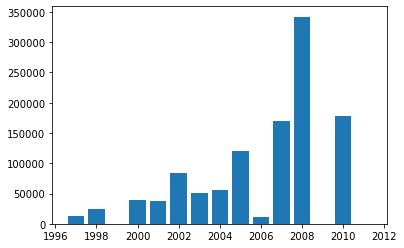

In [26]:
plt.bar(years, numfail)
plt.show()
#lots of failures in 2008

In [27]:
states = list(mexico.state.unique())
h = []
for s in states:
    subset = mexico[mexico['state'] == s]
    homi = np.mean(subset['homicides'])
    h = h + [homi]
    print('State: ', s, ' Avg Homicides: ', homi)

State:  Distrito Federal  Avg Homicides:  99.30495842839501
State:  Quintana Roo  Avg Homicides:  44.127560254067696
State:  Guanajuato  Avg Homicides:  31.472047632911465
State:  Veracruz de Ignacio de la Llave  Avg Homicides:  12.56779137976375
State:  Sonora  Avg Homicides:  42.526523098848024
State:  Puebla  Avg Homicides:  66.51229818365287
State:  Tamaulipas  Avg Homicides:  36.66564116041958
State:  Jalisco  Avg Homicides:  125.70641292773436
State:  México  Avg Homicides:  74.2920016073449
State:  Baja California Sur  Avg Homicides:  12.498903745792546
State:  Coahuila de Zaragoza  Avg Homicides:  50.31872369493841
State:  Querétaro  Avg Homicides:  31.159237706600344
State:  Michoacán de Ocampo  Avg Homicides:  48.10338888888889
State:  Nuevo León  Avg Homicides:  128.07826318948844
State:  Aguascalientes  Avg Homicides:  28.698554919023927
State:  Baja California  Avg Homicides:  231.75129745716995
State:  Yucatán  Avg Homicides:  17.922021429133213
State:  Tlaxcala  Avg Homi

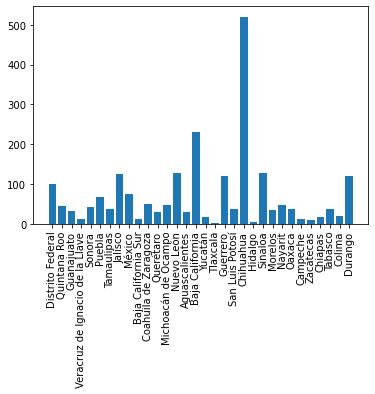

In [28]:
plt.bar(states, h)
plt.xticks(rotation=90)
plt.show()
#lots of failures in 2008

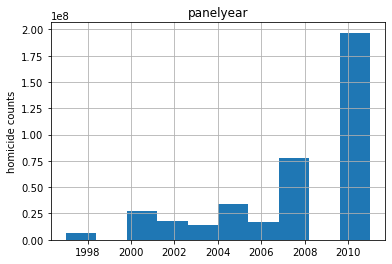

In [29]:
mexico.hist('panelyear',weights=mexico['homicides'] )
plt.ylabel('homicide counts')
plt.show()

In [30]:
states = list(mexico.state.unique())
crime = []
for s in states:
    subset = mexico[mexico['state'] == s]
    tcrime = np.mean(subset['Total_crimepc'])
    crime += [tcrime]
    print('State: ', s, ' Crime pc: ', tcrime)

State:  Distrito Federal  Crime pc:  0.3269445780262378
State:  Quintana Roo  Crime pc:  0.18912975342982616
State:  Guanajuato  Crime pc:  0.5295925333181374
State:  Veracruz de Ignacio de la Llave  Crime pc:  1.2017286748675435
State:  Sonora  Crime pc:  0.5603225100147309
State:  Puebla  Crime pc:  1.1161456101147813
State:  Tamaulipas  Crime pc:  0.3658700161862216
State:  Jalisco  Crime pc:  0.892868517205929
State:  México  Crime pc:  2.392342077993871
State:  Baja California Sur  Crime pc:  0.11517769595144453
State:  Coahuila de Zaragoza  Crime pc:  0.19214746888022377
State:  Querétaro  Crime pc:  0.13039858814717364
State:  Michoacán de Ocampo  Crime pc:  0.576595093413325
State:  Nuevo León  Crime pc:  0.5177507810778148
State:  Aguascalientes  Crime pc:  0.07277353925086466
State:  Baja California  Crime pc:  0.2430874532517823
State:  Yucatán  Crime pc:  1.9646968482895868
State:  Tlaxcala  Crime pc:  0.2865298828530275
State:  Guerrero  Crime pc:  0.20268617473924236
Stat

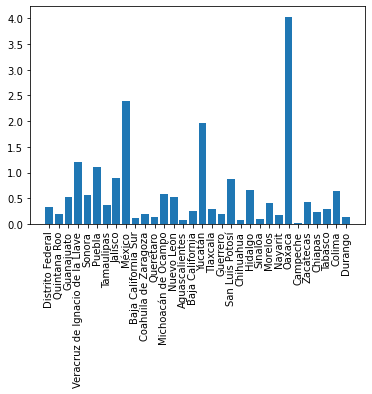

In [31]:
plt.bar(states, crime)
plt.xticks(rotation=90)
plt.show()
#a lot more crime per capita in Oaxaca

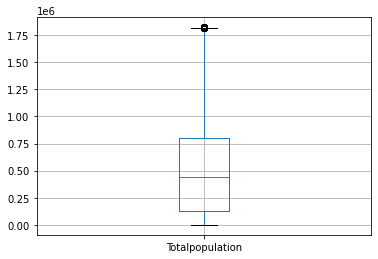

In [32]:
mexico.boxplot('Totalpopulation')

Questions for reviewers:
- Do you have concerns about the way we handled NaNs or any suggestions on how to better deal with them?
- 